*   Nama : Wahyu Krisna Aji
*   Dataset : kaggle_movie_train.csv
*   Sumber : Kaggle
*   Link Dataset : https://www.kaggle.com/lokkagle/movie-genre-datamovie-genre-data

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,Dense,Embedding,Dropout
from tensorflow.keras.models import Sequential

In [3]:
class modelCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') > 0.9):
      print("Expected accuracy have been achieved")
      self.model.stop_training = True
cb = modelCallbacks()

In [4]:
data = pd.read_csv('kaggle_movie_train.csv', sep = ',')
data.tail()

,id,text,genre
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action
22578,28166,"rd walks off down the hallway, leaving his pos...",comedy


In [5]:
data['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [6]:
data = data.drop(columns=[
    'id'])

In [7]:
data.head()

,text,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [8]:
data = data[~data['genre'].isin(['sci-fi','horror','other','adventure','romance'])]
data['genre'].value_counts()

drama       8873
thriller    6824
comedy      2941
action      2392
Name: genre, dtype: int64

In [9]:
genre = pd.get_dummies(data['genre'])
data_baru = pd.concat([data, genre], axis=1)
data_baru = data_baru.drop(columns='genre')
data_baru

,text,action,comedy,drama,thriller
0,"eady dead, maybe even wishing he was. INT. 2ND...",0,0,0,1
1,"t, summa cum laude and all. And I'm about to l...",0,1,0,0
2,"up Come, I have a surprise.... She takes him ...",0,0,1,0
3,ded by the two detectives. INT. JEFF'S APARTME...,0,0,0,1
4,"nd dismounts, just as the other children reach...",0,0,1,0
...,...,...,...,...,...
22574,n in the world to decide what I'm going to do ...,0,0,1,0
22575,shards. BOJO LAZ! Laz pushes Deke back through...,0,0,1,0
22576,"OTTIE You've got a thing about Ernie's, haven'...",0,0,0,1
22577,....with marked skill and dexterity . LANA wry...,1,0,0,0


In [10]:
data_baru.columns

Index(['text', 'action', 'comedy', 'drama', 'thriller'], dtype='object')

In [11]:
# tentang_film = data_baru['about'].str.lower()
tentang_film = data_baru['text'].astype(str)
genre_film = data_baru[[
       'action', 'comedy', 'drama', 'thriller']].values

In [12]:
tentang_latih, tentang_test, genre_latih, genre_test = train_test_split(tentang_film, genre_film, test_size=0.2)

In [13]:
tokenizer = Tokenizer(num_words=5000, oov_token='*')
tokenizer.fit_on_texts(tentang_latih) 
tokenizer.fit_on_texts(tentang_test)
 
sekuens_latih = tokenizer.texts_to_sequences(tentang_latih)
sekuens_test = tokenizer.texts_to_sequences(tentang_test)
 
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [20]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax')
])
Adam(learning_rate=0.00146, name='Adam')
model.compile(optimizer = 'Adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 4)                 516       
                                                                 
Total params: 109,572
Trainable params: 109,572
Non-trainable params: 0
_________________________________________________________________


In [22]:
model_history = model.fit(
    padded_latih, 
    genre_latih, 
    epochs=50, 
    validation_data=(padded_test, genre_test), 
    verbose=2,
    batch_size=128,
    callbacks=[cb]
  )

Epoch 1/50
132/132 - 57s - loss: 1.2472 - accuracy: 0.4152 - val_loss: 1.0596 - val_accuracy: 0.4746 - 57s/epoch - 432ms/step
Epoch 2/50
132/132 - 53s - loss: 0.9142 - accuracy: 0.5394 - val_loss: 0.8236 - val_accuracy: 0.6020 - 53s/epoch - 402ms/step
Epoch 3/50
132/132 - 52s - loss: 0.7359 - accuracy: 0.6504 - val_loss: 0.7920 - val_accuracy: 0.6605 - 52s/epoch - 395ms/step
Epoch 4/50
132/132 - 58s - loss: 0.6715 - accuracy: 0.7023 - val_loss: 0.8139 - val_accuracy: 0.6512 - 58s/epoch - 437ms/step
Epoch 5/50
132/132 - 54s - loss: 0.6001 - accuracy: 0.7291 - val_loss: 0.9027 - val_accuracy: 0.6362 - 54s/epoch - 411ms/step
Epoch 6/50
132/132 - 54s - loss: 0.5399 - accuracy: 0.7565 - val_loss: 0.7219 - val_accuracy: 0.7019 - 54s/epoch - 410ms/step
Epoch 7/50
132/132 - 58s - loss: 0.4727 - accuracy: 0.7801 - val_loss: 0.7614 - val_accuracy: 0.7092 - 58s/epoch - 439ms/step
Epoch 8/50
132/132 - 54s - loss: 0.4243 - accuracy: 0.8025 - val_loss: 0.6682 - val_accuracy: 0.7385 - 54s/epoch - 410

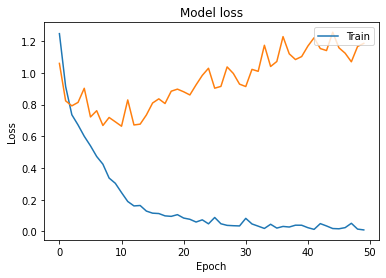

In [23]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

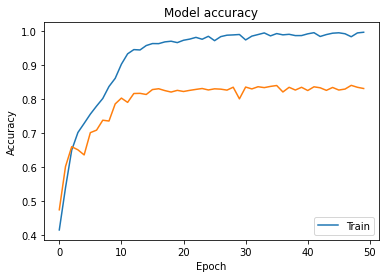

In [24]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()